In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from sklearn.impute import KNNImputer

In [2]:
# Load the data
df = pd.read_csv("01_dataset.csv", index_col='customer_id')
df.head()

,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,...,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
customer_id,,,,,,,,,,,,,,,,,,,,,
1639,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,2.000000,2.000000,2.000000,7.000000,3.666667,7.0,3.666667,3.666667,1000000.0
23717,0,10.0,1.0,NaN,7.0,1.0,1.0,4.0,NaN,NaN,...,2.000000,7.000000,2.000000,2.000000,7.000000,7.000000,7.0,7.000000,7.000000,NaN
19474,0,7.0,7.0,NaN,7.0,NaN,1.0,1.0,4.0,NaN,...,7.000000,5.571429,5.571429,5.571429,7.000000,7.000000,7.0,7.000000,7.000000,1000620.0
15505,0,7.0,1.0,1.0,NaN,1.0,NaN,7.0,1.0,1.0,...,6.090909,7.000000,NaN,NaN,4.500000,5.333333,7.0,5.333333,3.666667,1000170.0
1538,1,NaN,NaN,1.0,1.0,1.0,1.0,1.0,4.0,1.0,...,2.000000,2.000000,2.000000,2.000000,3.666667,7.000000,7.0,7.000000,3.666667,1000270.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1639 to 18772
Columns: 123 entries, label to OUTSTANDING_BAL_ALL_CURRENT
dtypes: float64(122), int64(1)
memory usage: 18.9 MB


In [4]:
df['label'].value_counts()

label
0    16356
1     3644
Name: count, dtype: int64

Tìm outlier dựa trên phân bố data

In [5]:
df.iloc[:, :20].describe()

,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M
count,20000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.182200,6.040667,3.316833,1.063333,3.177000,1.610500,1.061333,3.850500,2.730833,1.002333,8.415333,3.839833,5.589667,5.285667,4.051833,2.197833,12.695167,6.891000,6.787833,3.693333
std,0.386019,3.620554,3.147751,0.446094,2.211548,1.547231,0.437320,2.550394,2.519339,0.089415,4.683167,2.852946,3.381064,5.288442,4.717950,1.952411,8.137276,6.372549,4.193145,2.926163
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,1.000000,7.000000,4.000000,4.000000,1.000000
50%,0.000000,7.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,7.000000,4.000000,4.000000,4.000000,1.000000,1.000000,10.000000,4.000000,7.000000,4.000000
75%,0.000000,7.000000,4.000000,1.000000,4.000000,1.000000,1.000000,4.000000,4.000000,1.000000,10.000000,4.000000,7.000000,7.000000,4.000000,4.000000,16.000000,10.000000,10.000000,4.000000
max,1.000000,25.000000,25.000000,7.000000,13.000000,22.000000,7.000000,16.000000,19.000000,7.000000,34.000000,25.000000,22.000000,55.000000,55.000000,40.000000,67.000000,61.000000,43.000000,25.000000


In [6]:
df.iloc[:, 20:40].describe()

,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04
mean,5.504833,6.652500,7.359667,3.699000,5.499667,6.664167,7.345333,3.713500,5.508833,6.663000,7.367833,1.000714e+06,1.000599e+06,1.000606e+06,1.000592e+06,1.000546e+06,1.000192e+06,1.000184e+06,1.000175e+06,1.000164e+06
std,3.698207,4.193652,4.531753,2.940047,3.698751,4.197106,4.511859,2.941411,3.699281,4.193496,4.537658,3.873444e+03,3.126363e+03,3.413465e+03,3.593461e+03,2.992907e+03,4.727409e+02,4.692441e+02,4.743085e+02,4.599257e+02
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05
25%,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,1.000070e+06,1.000047e+06,1.000040e+06,1.000033e+06,1.000028e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
50%,4.000000,7.000000,7.000000,4.000000,4.000000,7.000000,7.000000,4.000000,4.000000,7.000000,7.000000,1.000180e+06,1.000133e+06,1.000120e+06,1.000104e+06,1.000092e+06,1.000010e+06,1.000010e+06,1.000009e+06,1.000008e+06
75%,7.000000,10.000000,10.000000,4.000000,7.000000,10.000000,10.000000,4.000000,7.000000,10.000000,10.000000,1.000452e+06,1.000373e+06,1.000362e+06,1.000340e+06,1.000319e+06,1.000200e+06,1.000180e+06,1.000157e+06,1.000140e+06
max,28.000000,46.000000,76.000000,25.000000,28.000000,46.000000,76.000000,25.000000,28.000000,46.000000,76.000000,1.169190e+06,1.150050e+06,1.150055e+06,1.166587e+06,1.179359e+06,1.014880e+06,1.014692e+06,1.014466e+06,1.014471e+06


In [7]:
df.iloc[:, 40:60].describe()

,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN
count,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04
mean,1.000792e+06,1.000796e+06,1.000767e+06,1.000730e+06,1.000011e+06,1.000011e+06,1.000011e+06,1.000013e+06,1.000016e+06,1.000004e+06,1.000004e+06,1.000004e+06,1.000006e+06,1.000008e+06,1.000011e+06,1.000011e+06,1.000011e+06,1.000013e+06,1.000016e+06,1.000001e+06
std,3.339969e+03,3.613264e+03,3.719770e+03,3.595518e+03,5.300619e+00,4.106250e+00,3.549107e+00,5.830253e+00,1.113854e+01,1.009577e+01,9.725583e+00,9.501470e+00,1.124196e+01,1.529541e+01,4.723947e+00,3.641940e+00,3.123959e+00,5.326868e+00,1.031378e+01,3.030946e+00
min,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,1.000000e+06
25%,1.000070e+06,1.000060e+06,1.000048e+06,1.000040e+06,1.000008e+06,1.000010e+06,1.000010e+06,1.000009e+06,1.000009e+06,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,1.000009e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000009e+06,1.000000e+06
50%,1.000220e+06,1.000198e+06,1.000172e+06,1.000148e+06,1.000010e+06,1.000011e+06,1.000011e+06,1.000012e+06,1.000013e+06,1.000008e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000008e+06,1.000010e+06,1.000011e+06,1.000011e+06,1.000012e+06,1.000013e+06,1.000000e+06
75%,1.000630e+06,1.000608e+06,1.000573e+06,1.000526e+06,1.000013e+06,1.000014e+06,1.000013e+06,1.000018e+06,1.000021e+06,1.000011e+06,1.000012e+06,1.000013e+06,1.000016e+06,1.000016e+06,1.000013e+06,1.000014e+06,1.000013e+06,1.000017e+06,1.000020e+06,1.000000e+06
max,1.150050e+06,1.150055e+06,1.166860e+06,1.179578e+06,1.000020e+06,1.000015e+06,1.000013e+06,1.000020e+06,1.000040e+06,1.000020e+06,1.000015e+06,1.000013e+06,1.000020e+06,1.000040e+06,1.000020e+06,1.000015e+06,1.000013e+06,1.000020e+06,1.000040e+06,1.000010e+06


In [8]:
df.iloc[:, 60:80].describe()

,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M
count,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,1.000000e+06,9.999987e+05,9.999982e+05,1.000001e+06,1.000000e+06,1.000220e+06,430.368833,430.649222,430.859611,430.882944,1.646000,13.917222,18.338611,22.491389,26.259444,5.918333,9.971667,12.068056,3.801944,4.376667
std,1.676551e+00,5.137247e+00,4.460206e+00,3.490028e+00,1.776214e+00,5.072104e+02,16.285436,12.146990,7.688496,7.022708,5.962018,9.984116,16.190246,22.262917,28.365308,8.309496,4.579341,6.487097,4.128801,4.778418
min,1.000000e+06,9.999900e+05,9.999900e+05,1.000000e+06,1.000000e+06,9.999900e+05,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,431.000000,431.000000,431.000000,431.000000,1.000000,7.000000,7.000000,7.000000,7.000000,2.000000,7.000000,7.000000,2.000000,2.000000
50%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000010e+06,431.000000,431.000000,431.000000,431.000000,1.000000,12.000000,12.000000,17.000000,17.000000,2.000000,7.000000,12.000000,2.000000,2.000000
75%,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000240e+06,431.000000,431.000000,431.000000,431.000000,1.000000,17.000000,22.000000,27.000000,32.000000,7.000000,12.000000,17.000000,2.000000,7.000000
max,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.000010e+06,1.010220e+06,431.000000,431.000000,431.000000,431.000000,280.000000,132.000000,222.000000,317.000000,412.000000,107.000000,67.000000,102.000000,52.000000,87.000000


<Axes: xlabel='label', ylabel='CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'>

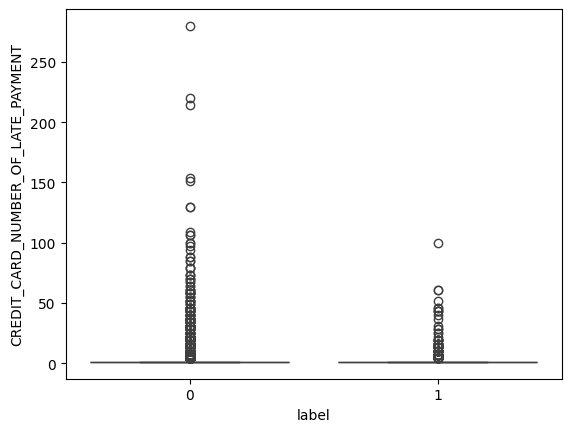

In [9]:
sns.boxplot(x=df['label'], y=df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'])

In [10]:
df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'].value_counts()

CREDIT_CARD_NUMBER_OF_LATE_PAYMENT
1.0      17316
4.0        223
7.0        125
10.0        63
13.0        45
16.0        34
19.0        28
22.0        23
37.0        14
25.0        13
31.0        13
43.0        11
28.0        10
46.0         9
40.0         9
34.0         8
52.0         6
58.0         6
61.0         6
79.0         3
55.0         3
73.0         3
49.0         3
70.0         3
100.0        3
64.0         2
85.0         2
130.0        2
67.0         2
106.0        2
88.0         2
220.0        1
151.0        1
154.0        1
97.0         1
214.0        1
94.0         1
109.0        1
280.0        1
Name: count, dtype: int64

In [11]:
df[df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT']==1]['label'].sum()

3175

<Axes: xlabel='label', ylabel='ENQUIRIES_12M'>

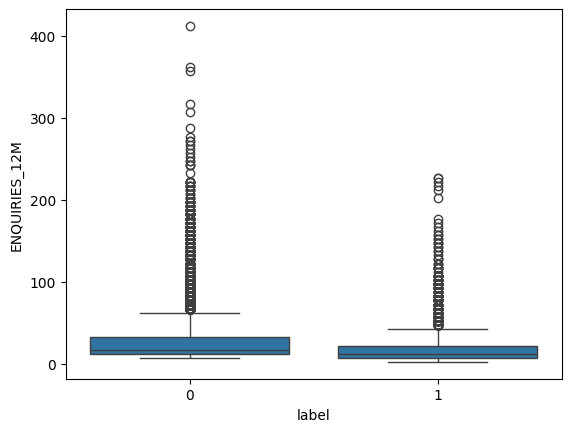

In [12]:
sns.boxplot(y=df['ENQUIRIES_12M'], x=df['label'])

In [13]:
df[df['ENQUIRIES_12M']>100]['ENQUIRIES_3M']

customer_id
3470     52.0
12240     NaN
25030    27.0
14338    72.0
21896    37.0
         ... 
6604     27.0
10629    82.0
20966    17.0
3510     37.0
21269    37.0
Name: ENQUIRIES_3M, Length: 551, dtype: float64

In [14]:
df.iloc[:, 80:100].describe()

,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,9.666111,3.488056,2.312500,8.717222,11.527222,15.065278,5.143056,6.147778,10.944167,4.567500,2.564167,11.758056,12.712778,17.858889,6.536667,7.899722,11.938611,5.796389,2.777222,14.688333
std,3.856943,3.770364,1.382813,13.592186,6.359669,10.151769,6.587868,7.821758,5.145577,6.039934,2.004161,19.203284,7.738665,13.653567,9.170060,10.948678,6.151310,8.361182,2.497030,24.821281
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,7.000000,2.000000,2.000000,2.000000,7.000000,7.000000,2.000000,2.000000,7.000000,2.000000,2.000000,2.000000,7.000000,7.000000,2.000000,2.000000,7.000000,2.000000,2.000000,2.000000
50%,7.000000,2.000000,2.000000,2.000000,12.000000,12.000000,2.000000,2.000000,12.000000,2.000000,2.000000,2.000000,12.000000,12.000000,2.000000,2.000000,12.000000,2.000000,2.000000,2.000000
75%,12.000000,2.000000,2.000000,12.000000,12.000000,17.000000,7.000000,7.000000,12.000000,7.000000,2.000000,12.000000,17.000000,22.000000,7.000000,12.000000,17.000000,7.000000,2.000000,17.000000
max,52.000000,52.000000,27.000000,172.000000,87.000000,122.000000,102.000000,107.000000,52.000000,82.000000,42.000000,247.000000,117.000000,172.000000,147.000000,147.000000,72.000000,112.000000,47.000000,347.000000


In [15]:
df.iloc[:, 100:120].describe()

,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M
count,18000.000000,18000.000000,18000.00000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,13.634722,20.272222,7.79500,9.614722,12.704722,6.919444,2.936389,6.170283,6.363862,6.517224,6.044263,5.482910,0.885535,1.524688,1.956620,1.531301,1.013238,6.458641,6.591671,6.691829
std,8.944748,17.260285,11.62626,14.087645,7.077098,10.687863,2.929740,1.323917,1.177703,1.039699,1.389014,1.646381,3.950227,4.182101,4.304385,3.967109,3.560061,1.147119,1.022613,0.914260
min,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,2.000000,2.000000,2.000000
25%,7.000000,7.000000,2.00000,2.000000,7.000000,2.000000,2.000000,5.333333,6.000000,7.000000,5.125000,4.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,7.000000,7.000000,7.000000
50%,12.000000,17.000000,2.00000,2.000000,12.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,7.000000,7.000000
75%,17.000000,27.000000,7.00000,12.000000,17.000000,7.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.142857,7.000000,7.000000,5.333333,3.000000,7.000000,7.000000,7.000000
max,127.000000,217.000000,192.00000,182.000000,82.000000,142.000000,52.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [16]:
# Kiểm tra các cột và hàng có giá trị âm

enquiries = df.filter(like='ENQUIRIES').columns

negative_cols = []

for col in enquiries:
    if df[df[col]<0].shape[0]>0:
        negative_cols.append(col)


negative_rows = set()

for col in negative_cols:
    for i in df.index:
        if df.loc[i, col]<0:
            negative_rows.add(i)

print("Number of negative row with negative values: ",len(negative_rows))

Number of negative row with negative values:  9120


In [17]:
negative_cols

['ENQUIRIES_FROM_BANK_3M_6M',
 'ENQUIRIES_FROM_BANK_6M_9M',
 'ENQUIRIES_FROM_BANK_9M_12M',
 'ENQUIRIES_FROM_BANK_6M_12M',
 'ENQUIRIES_FROM_BANK_3M_12M']

In [18]:
# Thay thế các giá trị âm bằng giá trị hợp lý

def replace_negative_values(x):
    if pd.isna(x):
        return x
    return abs(x)

for col in negative_cols:
    df[col] = df[col].apply(replace_negative_values)

In [19]:
df['ENQUIRIES_FROM_BANK_3M_6M']

customer_id
1639          NaN
23717    3.000000
19474    7.000000
15505    4.222222
1538     2.000000
           ...   
13215    3.000000
938      2.000000
11823    4.222222
14609    4.500000
18772    3.000000
Name: ENQUIRIES_FROM_BANK_3M_6M, Length: 20000, dtype: float64

In [20]:
df['ENQUIRIES_FROM_BANK_3M_6M']+df['ENQUIRIES_FROM_NON_BANK_3M_6M']

customer_id
1639           NaN
23717    10.000000
19474    14.000000
15505     8.722222
1538      5.666667
           ...    
13215          NaN
938       9.000000
11823    11.222222
14609    11.500000
18772          NaN
Length: 20000, dtype: float64

In [21]:
df.iloc[:, 100:120].describe()

,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M
count,18000.000000,18000.000000,18000.00000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,13.634722,20.272222,7.79500,9.614722,12.704722,6.919444,2.936389,6.170283,6.363862,6.517224,6.044263,5.482910,3.640202,4.011022,4.278287,3.826634,3.334572,6.458641,6.591671,6.691829
std,8.944748,17.260285,11.62626,14.087645,7.077098,10.687863,2.929740,1.323917,1.177703,1.039699,1.389014,1.646381,1.771075,1.930178,2.012845,1.854461,1.606474,1.147119,1.022613,0.914260
min,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,7.000000,7.000000,2.00000,2.000000,7.000000,2.000000,2.000000,5.333333,6.000000,7.000000,5.125000,4.000000,2.000000,3.000000,3.000000,2.625000,2.000000,7.000000,7.000000,7.000000
50%,12.000000,17.000000,2.00000,2.000000,12.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,6.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000
75%,17.000000,27.000000,7.00000,12.000000,17.000000,7.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.142857,7.000000,7.000000,5.333333,3.000000,7.000000,7.000000,7.000000
max,127.000000,217.000000,192.00000,182.000000,82.000000,142.000000,52.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [22]:
df.iloc[:, 120:].describe()

,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
count,18000.000000,18000.000000,1.800000e+04
mean,6.402545,6.006104,1.000943e+06
std,1.177294,1.431080,4.007350e+03
min,2.000000,2.000000,1.000000e+06
25%,7.000000,4.500000,1.000100e+06
50%,7.000000,7.000000,1.000290e+06
75%,7.000000,7.000000,1.000770e+06
max,7.000000,7.000000,1.169190e+06


In [23]:
# Check for missing values, find columns with missing values
null_count = df.isnull().sum()
null_cols = null_count[null_count>0].index.to_list()
print("The number of columns with missing values:", len(null_cols))

The number of columns with missing values: 122


=> Tất cả các cột ngoại trừ customer_id và label đều có giá trị null

In [24]:
df.notnull().all(axis=1).sum()

0

=> Tất cả các hàng đều có ít nhất một giá trị null => Không thể xóa hết các hàng có chứa giá trị rỗng được, có thể nghĩ đến hướng impute data

In [25]:
cols = df.columns
integer_cols = [col for col in cols if 'enquiries' in col.lower() or "count" in col.lower() or "number" in col.lower() or 'num' in col.lower() or 'month' in col.lower()]
integer_cols[:5]

['SHORT_TERM_COUNT',
 'MID_TERM_COUNT',
 'LONG_TERM_COUNT',
 'SHORT_TERM_COUNT_BANK',
 'MID_TERM_COUNT_BANK']

In [26]:
# Kiểm tra xem số lượt tra cứu có hợp lệ không (phải là số nguyên)

def check_invalid_columns(value):
    if pd.isna(value):
        return False
    else:
        if int(value) != value:
            return False 
        return True
    
# Tìm các index tương ứng với các dòng có số lượt tra cứu không hợp lệ

invalid_rows = []
for col in integer_cols:
    temp = df[col].apply(check_invalid_columns)
    invalid_rows.append(temp[temp == False].index.to_list())

In [27]:
df.loc[invalid_rows[-1]][integer_cols[-1]]

customer_id
1639     3.666667
15505    3.666667
1538     3.666667
20339    3.250000
6629     5.333333
           ...   
1620     4.500000
2022     4.500000
9301     4.500000
22422    4.500000
11823    5.333333
Name: ENQUIRIES_FROM_NON_BANK_3M_12M, Length: 7575, dtype: float64

In [28]:
def check_not_int(value):
    if pd.isna(value):
        return True
    return int(value) == value

for col in df.columns:
    if df[col].apply(check_not_int).sum() != df.shape[0]:
        print(col, df[col].apply(check_not_int).sum())

OUTSTANDING_BAL_LOAN_3M 9341
OUTSTANDING_BAL_LOAN_6M 9129
OUTSTANDING_BAL_LOAN_9M 5133
OUTSTANDING_BAL_LOAN_12M 6073
OUTSTANDING_BAL_CC_3M 13670
OUTSTANDING_BAL_CC_6M 13210
OUTSTANDING_BAL_CC_9M 10688
OUTSTANDING_BAL_CC_12M 11187
OUTSTANDING_BAL_ALL_3M 8993
OUTSTANDING_BAL_ALL_6M 8767
OUTSTANDING_BAL_ALL_9M 4818
OUTSTANDING_BAL_ALL_12M 5821
OUTSTANDING_BAL_LOAN_3M_6M 6474
OUTSTANDING_BAL_LOAN_6M_9M 7723
OUTSTANDING_BAL_LOAN_9M_12M 3289
OUTSTANDING_BAL_LOAN_6M_12M 7301
OUTSTANDING_BAL_LOAN_3M_12M 5569
OUTSTANDING_BAL_CC_3M_6M 12551
OUTSTANDING_BAL_CC_6M_9M 13122
OUTSTANDING_BAL_CC_9M_12M 9560
OUTSTANDING_BAL_CC_6M_12M 13060
OUTSTANDING_BAL_CC_3M_12M 11928
OUTSTANDING_BAL_ALL_3M_6M 5385
OUTSTANDING_BAL_ALL_6M_9M 6540
OUTSTANDING_BAL_ALL_9M_12M 3010
OUTSTANDING_BAL_ALL_6M_12M 6327
OUTSTANDING_BAL_ALL_3M_12M 4809
ENQUIRIES_3M_6M 15085
ENQUIRIES_6M_9M 15816
ENQUIRIES_9M_12M 16342
ENQUIRIES_6M_12M 14134
ENQUIRIES_3M_12M 12057
ENQUIRIES_FROM_BANK_3M_6M 18522
ENQUIRIES_FROM_BANK_6M_9M 18144
EN

In [29]:
# Xử lý các giá trị không hợp lệ bằng cách làm tròn giá trị về số nguyên gần nhất

def replace_float_to_int(value):
    if pd.isna(value):
        return value
    return math.floor(value) if math.ceil(value) - value > value - math.floor(value) else math.ceil(value)

for col in integer_cols:
    df[col] = df[col].apply(replace_float_to_int)

In [30]:
df.loc[invalid_rows[-1]][integer_cols[-1]]

customer_id
1639     4.0
15505    4.0
1538     4.0
20339    3.0
6629     5.0
        ... 
1620     5.0
2022     5.0
9301     5.0
22422    5.0
11823    5.0
Name: ENQUIRIES_FROM_NON_BANK_3M_12M, Length: 7575, dtype: float64

In [31]:
df.columns

Index(['label', 'SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT',
       'SHORT_TERM_COUNT_BANK', 'MID_TERM_COUNT_BANK', 'LONG_TERM_COUNT_BANK',
       'SHORT_TERM_COUNT_NON_BANK', 'MID_TERM_COUNT_NON_BANK',
       'LONG_TERM_COUNT_NON_BANK',
       ...
       'ENQUIRIES_FROM_BANK_6M_9M', 'ENQUIRIES_FROM_BANK_9M_12M',
       'ENQUIRIES_FROM_BANK_6M_12M', 'ENQUIRIES_FROM_BANK_3M_12M',
       'ENQUIRIES_FROM_NON_BANK_3M_6M', 'ENQUIRIES_FROM_NON_BANK_6M_9M',
       'ENQUIRIES_FROM_NON_BANK_9M_12M', 'ENQUIRIES_FROM_NON_BANK_6M_12M',
       'ENQUIRIES_FROM_NON_BANK_3M_12M', 'OUTSTANDING_BAL_ALL_CURRENT'],
      dtype='object', length=123)

In [32]:
df['NUM_NEW_LOAN_TAKEN_3M'].apply(check_invalid_columns).sum()

18000

In [33]:
# Kiểm tra lại xem các cột số nguyên đã hợp lệ chưa
for col in df.columns:
    if df[col].apply(check_not_int).sum() != df.shape[0]:
        print(col, df[col].apply(check_not_int).sum())

OUTSTANDING_BAL_LOAN_3M 9341
OUTSTANDING_BAL_LOAN_6M 9129
OUTSTANDING_BAL_LOAN_9M 5133
OUTSTANDING_BAL_LOAN_12M 6073
OUTSTANDING_BAL_CC_3M 13670
OUTSTANDING_BAL_CC_6M 13210
OUTSTANDING_BAL_CC_9M 10688
OUTSTANDING_BAL_CC_12M 11187
OUTSTANDING_BAL_ALL_3M 8993
OUTSTANDING_BAL_ALL_6M 8767
OUTSTANDING_BAL_ALL_9M 4818
OUTSTANDING_BAL_ALL_12M 5821
OUTSTANDING_BAL_LOAN_3M_6M 6474
OUTSTANDING_BAL_LOAN_6M_9M 7723
OUTSTANDING_BAL_LOAN_9M_12M 3289
OUTSTANDING_BAL_LOAN_6M_12M 7301
OUTSTANDING_BAL_LOAN_3M_12M 5569
OUTSTANDING_BAL_CC_3M_6M 12551
OUTSTANDING_BAL_CC_6M_9M 13122
OUTSTANDING_BAL_CC_9M_12M 9560
OUTSTANDING_BAL_CC_6M_12M 13060
OUTSTANDING_BAL_CC_3M_12M 11928
OUTSTANDING_BAL_ALL_3M_6M 5385
OUTSTANDING_BAL_ALL_6M_9M 6540
OUTSTANDING_BAL_ALL_9M_12M 3010
OUTSTANDING_BAL_ALL_6M_12M 6327
OUTSTANDING_BAL_ALL_3M_12M 4809


In [34]:
# Tìm những cột giống hệt nhau (không kể đến giá trị null)

drop_list = set()

correlation = df.corr()
for col in correlation.columns:
    for row in correlation.index:
        if correlation.loc[row, col] == 1 and row != col:
            drop_list.add(col)
            drop_list.add(row)

drop_list = list(drop_list)
drop_list

['NUM_NEW_LOAN_TAKEN_BANK_12M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_9M',
 'NUM_NEW_LOAN_TAKEN_12M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_3M',
 'NUM_NEW_LOAN_TAKEN_6M',
 'NUM_NEW_LOAN_TAKEN_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M']

In [35]:
# Drop những cột có giá trị giống hệt nhau (không kể đến những giá trị null)
df.drop(columns=['NUM_NEW_LOAN_TAKEN_BANK_3M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M', 'NUM_NEW_LOAN_TAKEN_BANK_6M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M', 'NUM_NEW_LOAN_TAKEN_BANK_9M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_BANK_12M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M'], inplace=True)

In [36]:
# Kiểm tra xem tổng các chỉ số của ngân hàng và phi ngân hàng có bằng chỉ số tổng quát không

bank_cols = []
non_bank_cols = []
total_cols = []

for col in df.columns:
    if col == 'label':
        continue
    if 'NON_BANK' in col:
        non_bank_cols.append(col)
    elif 'BANK' in col:
        bank_cols.append(col)
    else:
        total_cols.append(col)

for i in range (len(bank_cols)):
    if 'ENQUIRIES' in bank_cols[i]:
        if df[bank_cols[i]].sum() + df[non_bank_cols[i]].sum() == df[bank_cols[i].replace('_FROM_BANK', '')].sum():
            print(bank_cols[i].replace('_FROM_BANK', ''))
    elif (df[bank_cols[i]] + df[non_bank_cols[i]] - df[bank_cols[i].replace('_BANK', '')]).sum()==0:
        print(bank_cols[i].replace('_BANK', ''))

=> Tổng các chỉ số của ngân hàng và phi ngân hàng không bằng chỉ số tổng quát

In [37]:
# Kiểm tra xem tổng các chỉ số của thẻ tín dụng và các khoản vay có bằng các chỉ số của tất cả các sản phẩm tài chính không

loan_cols = []
all_cols = []
cc_cols = []

for col in df.columns:
    if 'ALL' in col:
        all_cols.append(col)
    elif 'CC' in col:
        cc_cols.append(col)

for i in range (len(all_cols)):
    if df[all_cols[i]].sum() == df[cc_cols[i]].sum()+df[all_cols[i].replace('ALL', 'LOAN')].sum():
        print(all_cols[i])

=> Tổng các chỉ số của thẻ tín dụng và các khoản vay không bằng các chỉ số của tất cả các sản phẩm tài chính

In [38]:
df['LONG_TERM_COUNT'] - df['LONG_TERM_COUNT_BANK'] - df['LONG_TERM_COUNT_NON_BANK'] +1

customer_id
1639     0.0
23717    NaN
19474    NaN
15505    NaN
1538     0.0
        ... 
13215    0.0
938      0.0
11823    0.0
14609    0.0
18772    0.0
Length: 20000, dtype: float64

=> Nhận thấy độ chênh lệch giữa các cột tổng quát và tổng của bank + non-bank là 1, có thể dữ liệu đã cho có sai sót

In [39]:
# Kiểm tra mối quan hệ giữa các cột tổng quát và non bank + bank
print('Short term count: ', (df['SHORT_TERM_COUNT'] - df['SHORT_TERM_COUNT_BANK'] - df['SHORT_TERM_COUNT_NON_BANK']+1).sum())
print('Mid term count: ', (df['MID_TERM_COUNT'] - df['MID_TERM_COUNT_BANK'] - df['MID_TERM_COUNT_NON_BANK']+1).sum())
print('Long term count: ', (df['LONG_TERM_COUNT'] - df['LONG_TERM_COUNT_BANK'] - df['LONG_TERM_COUNT_NON_BANK']+1).sum())

Short term count:  0.0
Mid term count:  0.0
Long term count:  0.0


In [40]:
# Kiểm tra những cột nào có sự sai số tương tự như trên

wrong_list = []

for i in range (len(bank_cols)):
    if 'ENQUIRIES' in bank_cols[i]:
        if (df[bank_cols[i]] + df[non_bank_cols[i]] - df[bank_cols[i].replace('_FROM_BANK', '')]-1).sum()==0:
            print(bank_cols[i].replace('_FROM_BANK', ''))
            wrong_list.append(bank_cols[i].replace('_FROM_BANK', ''))
    elif (df[bank_cols[i]] + df[non_bank_cols[i]] - df[bank_cols[i].replace('_BANK', '')]-1).sum()==0:
        print(bank_cols[i].replace('_BANK', ''))
        wrong_list.append(bank_cols[i].replace('_BANK', ''))

SHORT_TERM_COUNT
MID_TERM_COUNT
LONG_TERM_COUNT
NUMBER_OF_LOANS
NUMBER_OF_CREDIT_CARDS
NUMBER_OF_RELATIONSHIP


=> Các cột tổng có độ chênh lệch với tổng các cột bank và non-bank là 1

In [41]:
# Xử lý các cột có sai số

for col in wrong_list:
    df[col] = df[col+'_BANK'] + df[col+'_NON_BANK'] 

In [42]:
df.corr()['label'].sort_values(ascending=True)[:20]

OUTSTANDING_BAL_LOAN_9M_12M       -0.409176
OUTSTANDING_BAL_ALL_9M_12M        -0.365516
OUTSTANDING_BAL_LOAN_6M_9M        -0.364709
NUMBER_OF_LOANS                   -0.346372
NUMBER_OF_RELATIONSHIP            -0.334334
NUM_NEW_LOAN_TAKEN_12M            -0.326216
OUTSTANDING_BAL_ALL_6M_9M         -0.321813
SHORT_TERM_COUNT                  -0.317103
NUM_NEW_LOAN_TAKEN_9M             -0.304447
OUTSTANDING_BAL_LOAN_6M_12M       -0.280451
OUTSTANDING_BAL_LOAN_3M_6M        -0.272169
NUMBER_OF_LOANS_NON_BANK          -0.264508
NUMBER_OF_RELATIONSHIP_BANK       -0.260890
NUMBER_OF_LOANS_BANK              -0.259070
SHORT_TERM_COUNT_BANK             -0.258823
NUM_NEW_LOAN_TAKEN_6M             -0.255318
OUTSTANDING_BAL_ALL_6M_12M        -0.248647
NUMBER_OF_RELATIONSHIP_NON_BANK   -0.246642
SHORT_TERM_COUNT_NON_BANK         -0.219785
OUTSTANDING_BAL_ALL_3M_6M         -0.216759
Name: label, dtype: float64

In [48]:
# Dùng model machine learning để impute những giá trị còn thiếu

imputer = KNNImputer(n_neighbors=141)
df_imputed = imputer.fit_transform(df)

In [49]:
features = imputer.get_feature_names_out()
df_imputed = pd.DataFrame(df_imputed, columns=features, index=df.index)

In [50]:
df_imputed.describe()

,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,...,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,0.182200,7.045746,4.331200,2.062447,3.179340,1.606505,1.060959,3.853064,2.733491,1.002310,...,4.004459,4.266938,3.826799,3.337924,6.491707,6.611579,6.705482,6.433292,6.066878,1.000914e+06
std,0.386019,3.329474,3.051005,0.412928,2.110968,1.491412,0.421501,2.443015,2.454790,0.084898,...,1.852175,1.936789,1.777801,1.540442,1.054803,0.956083,0.864088,1.095109,1.321703,3.830226e+03
min,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000e+06
25%,0.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,2.000000,6.666667,7.000000,7.000000,6.255319,5.000000,1.000100e+06
50%,0.000000,7.702128,2.531915,2.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000290e+06
75%,0.000000,8.000000,5.000000,2.000000,4.000000,1.000000,1.000000,4.085106,4.000000,1.000000,...,6.000000,7.000000,5.000000,3.312057,7.000000,7.000000,7.000000,7.000000,7.000000,1.000760e+06
max,1.000000,26.000000,23.000000,8.000000,13.000000,22.000000,7.000000,16.000000,19.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.169190e+06


In [51]:
df.describe()

,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,...,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
count,20000.000000,16208.000000,16184.000000,16203.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04
mean,0.182200,7.037142,4.336938,2.063322,3.177000,1.610500,1.061333,3.850500,2.730833,1.002333,...,4.020722,4.286222,3.839722,3.348444,6.490056,6.612056,6.703722,6.432167,6.062278,1.000943e+06
std,0.386019,3.616185,3.177830,0.443933,2.211548,1.547231,0.437320,2.550394,2.519339,0.089415,...,1.933463,2.015653,1.859750,1.616292,1.090805,0.981183,0.886495,1.128924,1.367785,4.007350e+03
min,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000e+06
25%,0.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,2.000000,7.000000,7.000000,7.000000,7.000000,5.000000,1.000100e+06
50%,0.000000,8.000000,2.000000,2.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000290e+06
75%,0.000000,8.000000,5.000000,2.000000,4.000000,1.000000,1.000000,4.000000,4.000000,1.000000,...,7.000000,7.000000,5.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000770e+06
max,1.000000,26.000000,23.000000,8.000000,13.000000,22.000000,7.000000,16.000000,19.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.169190e+06


In [70]:
# Chuyển float thành int cho các cột số nguyên
df_imputed['label'] = df_imputed['label'].astype(int)

for col in integer_cols:
    if col in df_imputed.columns:
        df_imputed[col] = df_imputed[col].apply(replace_float_to_int)
        df_imputed[col] = df_imputed[col].astype(int)

In [71]:
df_imputed.select_dtypes(float)

,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,...,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,OUTSTANDING_BAL_ALL_CURRENT
customer_id,,,,,,,,,,,,,,,,,,,,,
1639,1000000.0,1.000000e+06,1.000000e+06,1.000000e+06,1.000205e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000004e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1000000.0,1000000.0,1.000000e+06,1.000000e+06,1.000000e+06,1000000.0,1.000000e+06
23717,1000250.0,1.000220e+06,1.000177e+06,1.000142e+06,1.000120e+06,1.000213e+06,1.000155e+06,1.000107e+06,1.000080e+06,1.000433e+06,...,1.000017e+06,1.000023e+06,1.000000e+06,1000000.0,1000000.0,1.000000e+06,1.000000e+06,1.000000e+06,1000200.0,1.000446e+06
19474,1000360.0,1.000397e+06,1.000323e+06,1.000267e+06,1.000215e+06,1.000210e+06,1.000198e+06,1.000151e+06,1.000113e+06,1.000607e+06,...,1.000016e+06,1.000018e+06,1.000000e+06,1000000.0,1000000.0,1.000000e+06,1.000002e+06,1.000000e+06,1000260.0,1.000620e+06
15505,1000040.0,1.000030e+06,1.000040e+06,1.000030e+06,1.000043e+06,1.000110e+06,1.000080e+06,1.000060e+06,1.000046e+06,1.000097e+06,...,1.000013e+06,1.000012e+06,1.000000e+06,1000000.0,1000000.0,1.000000e+06,1.000000e+06,1.000000e+06,1000130.0,1.000170e+06
1538,1000200.0,1.000210e+06,1.000142e+06,1.000094e+06,1.000071e+06,1.000069e+06,1.000088e+06,1.000070e+06,1.000052e+06,1.000242e+06,...,1.000019e+06,1.000024e+06,1.000010e+06,1000000.0,1000010.0,1.000000e+06,1.000010e+06,1.000000e+06,1000070.0,1.000270e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13215,1000010.0,1.000033e+06,1.000027e+06,1.000018e+06,1.000013e+06,9.999900e+05,9.999900e+05,9.999900e+05,9.999900e+05,1.000033e+06,...,1.000020e+06,1.000025e+06,1.000000e+06,1000000.0,999990.0,9.999921e+05,1.000000e+06,1.000000e+06,999990.0,1.000010e+06
938,1000020.0,1.000021e+06,1.000020e+06,1.000016e+06,1.000012e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000023e+06,...,1.000017e+06,1.000020e+06,1.000000e+06,1000000.0,1000000.0,1.000000e+06,1.000000e+06,1.000000e+06,1000000.0,1.000020e+06
11823,1000080.0,1.000063e+06,1.000199e+06,1.000291e+06,1.000292e+06,1.001110e+06,1.001012e+06,1.001007e+06,1.001066e+06,1.001173e+06,...,1.000009e+06,1.000009e+06,1.000000e+06,1000000.0,1000000.0,1.000000e+06,1.000000e+06,1.000000e+06,1000980.0,1.001060e+06


In [72]:
df_imputed.to_csv('cleaned_data.csv', index=True)